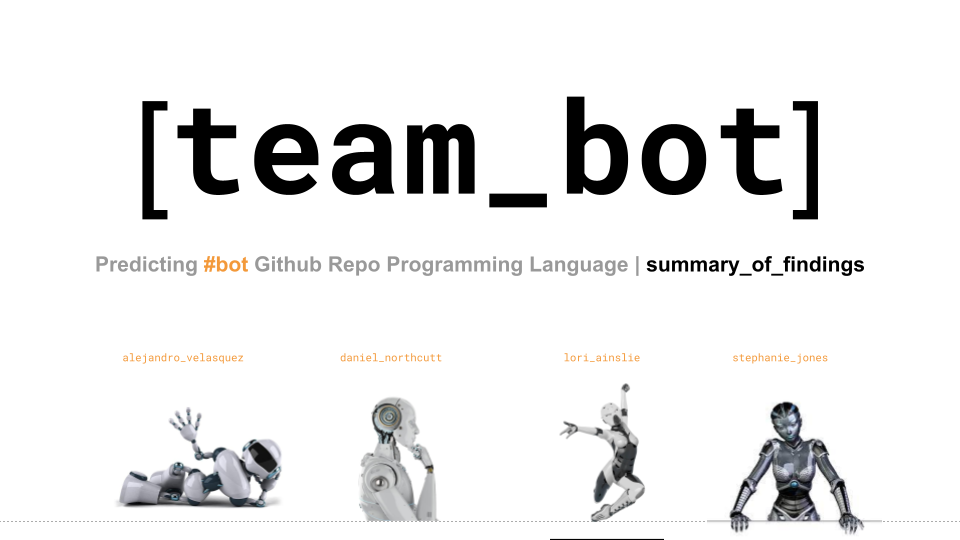

# Overview
(working links within `Jupyter Notebook`)
1. [Planning](#Planning)
2. [Acquisition](#Acquisition)
3. [Preparation](#Preparation)
4. [Exploration](#Exploration)
5. [Modeling](#Modeling)
6. [Conclusion](#Conclusion)

# Planning
[Back to the Top](#Overview)

The goal of this project was to build a classification model that can predict the programming language of a repository based on the text of the repository's `README.md` file. After some collaborative brainstorming, we decided to focus on repositories related to the search keyword **bot**. 
<br>
<br>

Our plan was to acquire the data using web scraping, clean the acquired data, and then perform exploratory analysis to determine a modeling strategy. Some initial questions that we had of the data were as follows:

<br>1. Which language is represented most frequently in the data?
<br>2. Is there any correlation between character and word count?
<br>3. Is there a difference in average word count or character count among the languages?
<br>4. Are any of the top 25 words found across all the languages?

For our primary planning tool, we used a [Trello Board](https://trello.com/b/KFt1reNg/githublanguage-prediction). 

### Data Dictionary
Target | Dtype | Description
:-- | :-- | :--
`language` | object | description

<hr>

Model Feature | Dtype | Description
:-- | :-- | :--
`repo` | object | Name of GitHub repo used to extract data
`readme_contents` | object | Repo's README.md 
`clean` | object | remove any inconsistencies in unicode characters from readme_contents. Converted the resulting string to the ASCII character set and turned the resulting bytes object back into a string 
`lemmatized` | object | turns data in `clean` into root words, also known as the lemma 
`word_count` | int64 | counts the words in the `lemmatized` column 
`char_count` | int64 | counts the characters in the `lemmatized` column 

<hr>

Language | Description
:-- | :--
`Python` |  an interpreted, object-oriented, high-level programming language with dynamic semantics
`JavaScript` | object-oriented computer programming language commonly used to create interactive effects within web browsers
`C#` |  is a general-purpose, multi-paradigm programming language
`TypeScript` | language developed and maintained by Microsoft. It is a strict syntactical superset of JavaScript and adds optional static typing to the language
`Java` | Java is a general-purpose programming language that is class-based and object-oriented

# Acquisition
You can find the code used to acquire the data for this project in our [acquire.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/acquire.py) module in our project Github repository. We saved our imported data to the [raw_data.csv]() file which can be used to modify and test functions in the [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/09a331cedf4346263e58dae1fdfaed41008dddf4/prepare.py) module.<br><br>
[Back to the Top](#Overview)

<hr>

To acquire the raw data, call the function **`scrape_github_data( )`** from the [acquire.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/acquire.py) module

In [1]:
# importing acquire module
import acquire

# acquiring the data
raw_data = acquire.scrape_github_data()

# verifying size
print(f'We initially acquired {raw_data.shape[0]} github repository data observations.')

We initially acquired 600 github repository data observations.


# Preparation
You can find the code used to clean, filter, and split the acquired data in our [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/prepare.py) module in our Github repository. The final DataFrame of cleaned and filtered data (prior to being split) was written to the [clean_data.csv](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/09a331cedf4346263e58dae1fdfaed41008dddf4/clean_data.csv) file in our Github repository. This is the data that will be split into train, validate, and test data, stratified on our target variable `language`.
<br><br>
[Back to the Top](#Overview)
### We took the follow steps to prepare our data for exploration:
1. Normalized text
2. Created tokens from normalized text and used those tokens to lemmatize the text strings
3. Removed stop words 
4. Removed repositories with text in a natural language other than English
5. Removed repositories with text in a programming language outside of the top 5 languages
6. Split the data 

<hr>

To split the data call the **`split_data()`** function from the [prepare.py](https://github.com/NLP-Project-Hopper2/NLP-Project-Hopper2/blob/c0f0c550bb07dc91ccbe29f80f545c96dffa713e/prepare.py) module.

In [2]:
import prepare

# calling function to split cleaned and filtered data
train, validate, test = prepare.split_data()

In [3]:
# preview of the data we will be exploring
train.head()

,repo,language,readme_contents,clean,lemmatized
41,facebookarchive/mention-bot,JavaScript,** THIS REPO HAS BEEN ARCHIVED AND IS NO LONGE...,repo archived longer actively maintained menti...,repo archived longer actively maintained menti...
117,pocheshire/BottomNavigationBar,C#,"# BottomNavigationBar\n<img src=""https://raw.g...",bottomnavigationbar img srchttpsrawgithubuserc...,bottomnavigationbar img srchttpsrawgithubuserc...
167,CrazyBotsz/Adv-Auto-Filter-Bot,Python,"# Adv Auto Filter Bot\r\n\r\n<p align=""center""...",adv auto filter bot p aligncenter hrefhttpsgit...,adv auto filter bot p aligncenter hrefhttpsgit...
110,jagrit007/Telegram-CloneBot,Python,# Why?\nFor all my friends using my TDs who no...,friends using tds need store everything instea...,friend using tds need store everything instead...
26,kyb3r/modmail,Python,"<div align=""center"">\n <img src=""https://i.im...",div aligncenter img srchttpsiimgurcomo558qnqpn...,div aligncenter img srchttpsiimgurcomo558qnqpn...


# Exploration
[Back to the Top](#Overview)<br><br>
Prior to exploring the below questions, we engineered the following features:
- `word_count`
- `char_count`

### Questions for Exploration:
1. Which language is represented most frequently in the data?
2. Is there any correlation between character and word count?
3. Is there a difference in average word count or character count among the languages?
4. Are any of the top 25 words found across all the languages?

In [4]:
# importing explore module
import explore

# adding new features
train, validate, test = explore.new_features(train, validate, test)

In [5]:
# lets take a look at how our data look after aplying prepare functions and explore new_features 
explore.post_explore_info(train, validate, test)

Records in Train data set    =  126
Records in Validate data set =  54
Records in Test data set     =  45
------------------------------------
------------ Data Info -------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 41 to 174
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             126 non-null    object
 1   language         126 non-null    object
 2   readme_contents  126 non-null    object
 3   clean            126 non-null    object
 4   lemmatized       126 non-null    object
 5   char_count       126 non-null    int64 
 6   word_count       126 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 7.9+ KB


# Q1. Which Language is represented most frequently in the data?

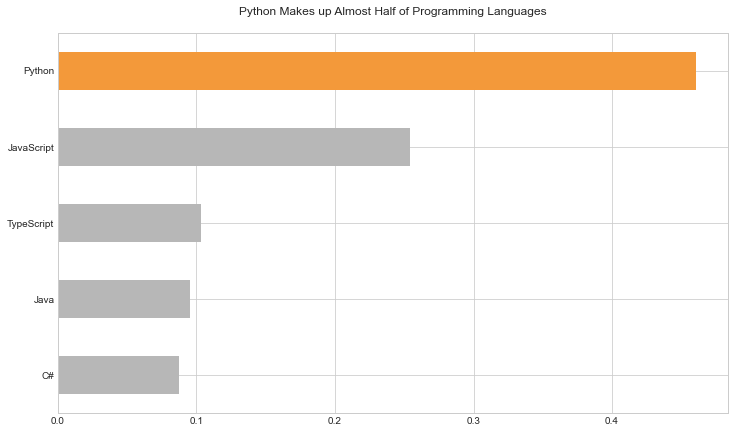

In [6]:
# viusalization for language counts in train
explore.language_count(train)

### Python is the language most frequently used for bot projects. It is the primary language for almost half of the repositories represented in the data.

# Q2. Is there any correlation between character count and word count?

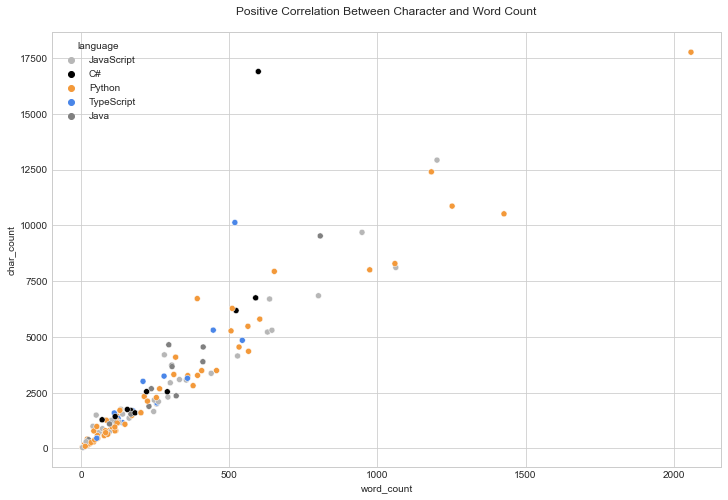

In [7]:
explore.char_word_corr(train)

### There is a positive correlation between character count and word count. Python and JavaScript have the highest counts.

# Q3. Is there a difference in average word count or character count among the languages?
### First we will look at the word count
$alpha$: .05 <br><br>
H$(o)$ `word_count`: There is no statistically significant difference in average word count by language.<br>
H$(a)$ `word_count`: There is a statistically significant difference in average word count by language.

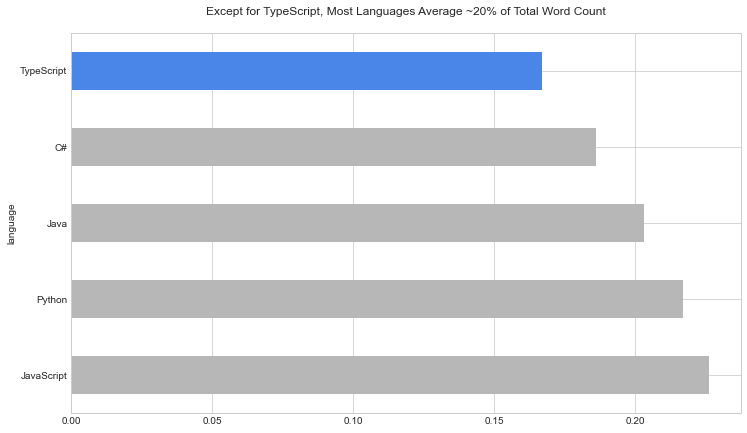

With an alpha of 0.05, a t-statistic of 1.97 and a p-value of 0.74, we fail to reject the null hypothesis.


In [8]:
# calling function to plot word count per language
explore.word_count(train)

### Now looking at character count
$alpha$: .05 <br><br>
H$(o)$ `char_count`: There is no statistically significant difference in average word count by language.<br>
H$(a)$ `char_count`: There is a statistically significant difference in average word count by language.

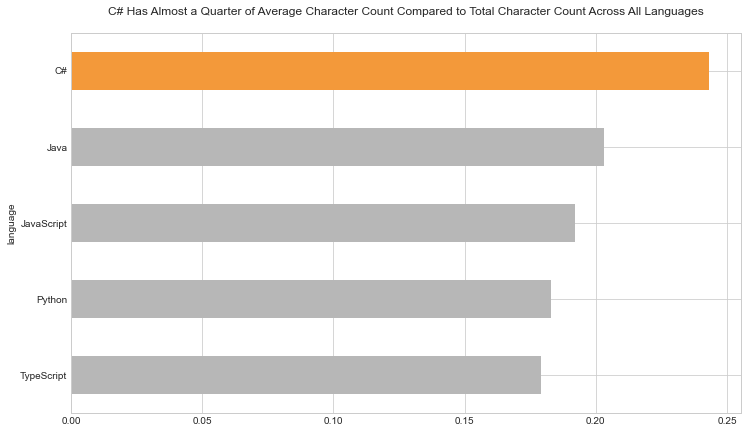

With an alpha of 0.05, a t-statistic of 3.9 and a p-value of 0.42, we fail to reject the null hypothesis.


In [9]:
explore.char_count(train)

### In the plotted graphs, there do appear to be differences in average character and word count but statistical testing shows that these differences are not statistically significant.

# Q4. Are any of the top 25 words found across all the languages?

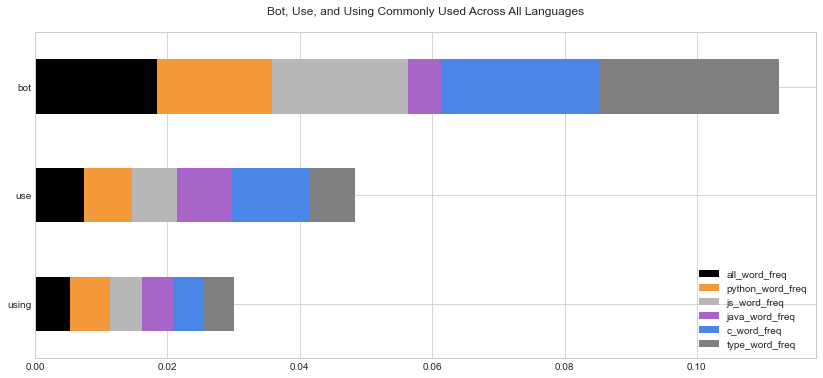

In [10]:
explore.top_25_freq(train)

### 'Bot', 'use', and 'using' are the top words found across all the languages.

# Takeaways from Explore

Python and JavaScript are the most popular programming languages for bot projects. Both languages have the highest character and word counts. Average word count or character counts by language are not statistically different, therefore, not good features to use for modeling. 

# Word Clouds

These were created to get a visual of the top words by language. The top wordcloud with the Github logo represents the top words in all the languages.

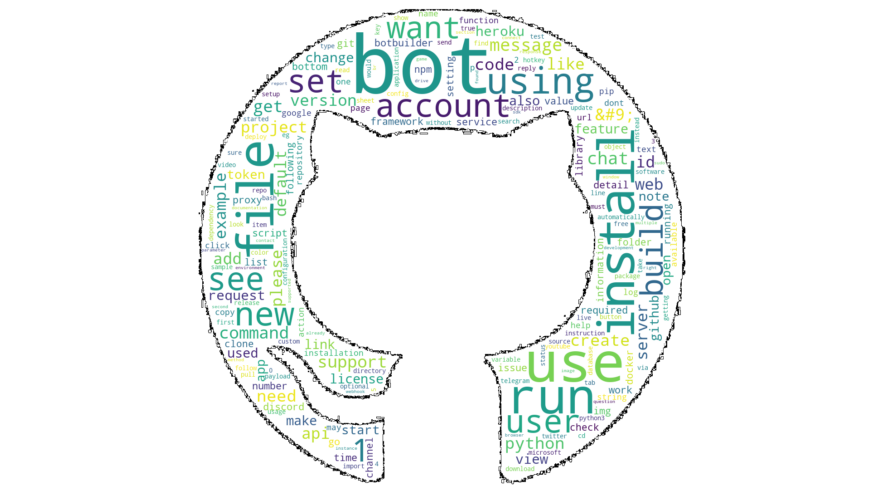

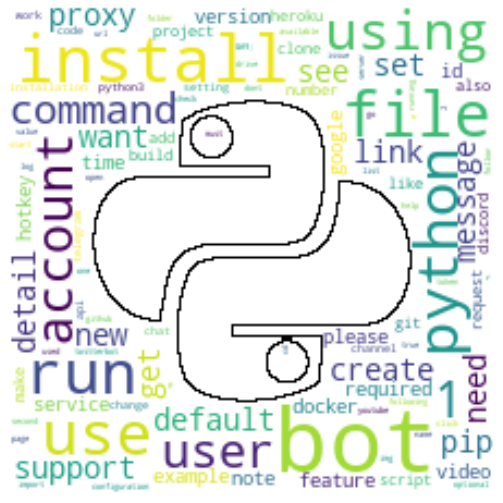

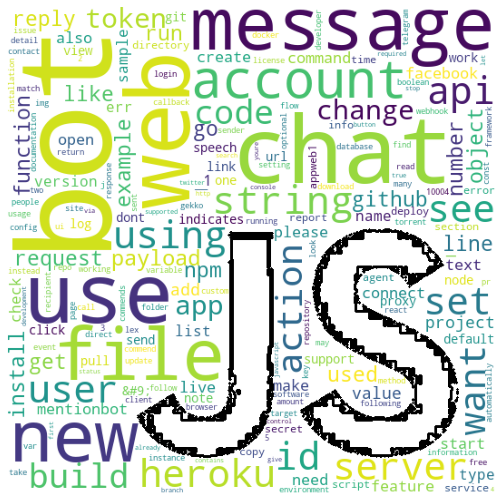

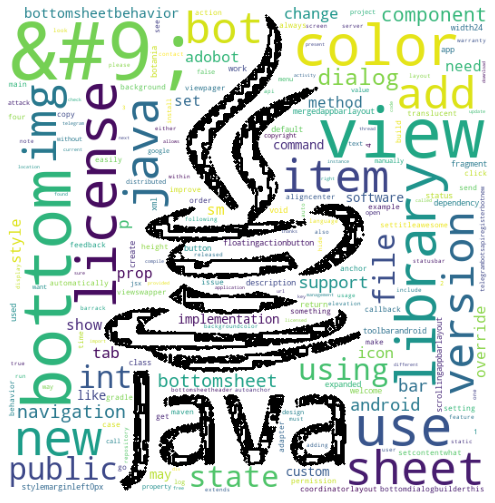

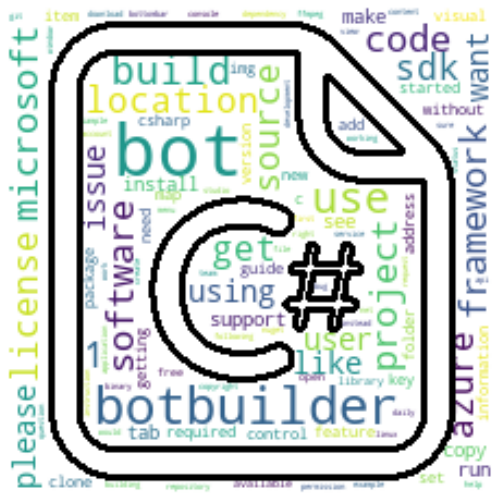

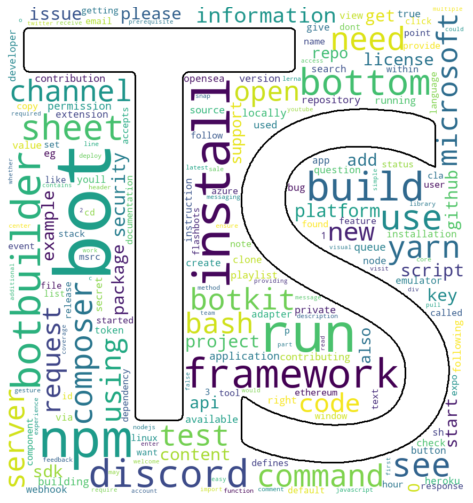

In [11]:
import word_clouds as wc
wc.git_logo()
wc.python_logo()
wc.js_logo()
wc.java_logo()
wc.c_logo2()
wc.ts_logo()

# Modeling
[Back to the Top](#Overview)

Modelling was run using TF-IDF Logistic Regression, Bag of Words Decision Tree, & Bag of Words Random Forest

Baseline was created by defining the most common language frequency Python - 46.03%

In [12]:
import model
# Defining our baseline accuracy by the most common language frequency
model.baseline_accuracy()

Baseline Accuracy: 46.03%


In [13]:
# Model ran on tfidf logistic regression
model.logistic_regression_tfidf()

Train Accuracy: 74.29%
---
Confusion Matrix
actual      C#  Java  JavaScript  Python  TypeScript
predicted                                           
Java        0   2     0           0       0         
JavaScript  0   0     18          0       0         
Python      6   5     0           32      7         
---
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         6
        Java       1.00      0.29      0.44         7
  JavaScript       1.00      1.00      1.00        18
      Python       0.64      1.00      0.78        32
  TypeScript       0.00      0.00      0.00         7

    accuracy                           0.74        70
   macro avg       0.53      0.46      0.44        70
weighted avg       0.65      0.74      0.66        70

----------------------------------------------
Validate Accuracy: 46.67%
---
Confusion Matrix
actual     C#  Java  JavaScript  Python  TypeScript
predicted                                          


In [14]:
# Model ran using bag of words decision tree (max depth = 5)
model.BoW_Decision_tree()

Accuracy: 88.57%
---
Confusion Matrix
actual          C#  Java  JavaScript  Python  TypeScript
tree_predicted                                          
C#              3   0     0           0       0         
Java            0   6     0           0       0         
JavaScript      0   1     17          0       1         
Python          0   0     1           31      1         
TypeScript      3   0     0           1       5         
---
              precision    recall  f1-score   support

          C#       1.00      0.50      0.67         6
        Java       1.00      0.86      0.92         7
  JavaScript       0.89      0.94      0.92        18
      Python       0.94      0.97      0.95        32
  TypeScript       0.56      0.71      0.63         7

    accuracy                           0.89        70
   macro avg       0.88      0.80      0.82        70
weighted avg       0.90      0.89      0.88        70

----------------------------------------------
Validate Accuracy: 53.3

In [15]:
# Model ran using bag of words for random forest (max depth = 8)
model.BoW_Random_Forest()

Accuracy: 91.43%
---
Confusion Matrix
actual            C#  Java  JavaScript  Python  TypeScript
forest_predicted                                          
C#                5   0     0           0       0         
Java              0   6     0           0       0         
JavaScript        0   0     16          0       0         
Python            1   1     2           32      2         
TypeScript        0   0     0           0       5         
---
              precision    recall  f1-score   support

          C#       1.00      0.83      0.91         6
        Java       1.00      0.86      0.92         7
  JavaScript       1.00      0.89      0.94        18
      Python       0.84      1.00      0.91        32
  TypeScript       1.00      0.71      0.83         7

    accuracy                           0.91        70
   macro avg       0.97      0.86      0.90        70
weighted avg       0.93      0.91      0.91        70

----------------------------------------------
Validate 

In [16]:
# running unseen data on bag of words random forest model
model.test_model_rf()

Accuracy: 50.00%
---
Confusion Matrix
actual          C#  Java  JavaScript  Python  TypeScript
tree_predicted                                          
C#              1   0     0           0       0         
Java            0   1     0           0       1         
JavaScript      1   1     1           2       1         
Python          0   0     4           10      1         
TypeScript      0   0     2           0       0         
---
              precision    recall  f1-score   support

          C#       1.00      0.50      0.67         2
        Java       0.50      0.50      0.50         2
  JavaScript       0.17      0.14      0.15         7
      Python       0.67      0.83      0.74        12
  TypeScript       0.00      0.00      0.00         3

    accuracy                           0.50        26
   macro avg       0.47      0.40      0.41        26
weighted avg       0.47      0.50      0.47        26



# Conclusion
[Back to the Top](#Overview)

Our goal was to build a classification model that can predict the programming language of a repository based on the text of the repository's `README.md` file. We built a model that performs with an `accuracy of 50%` on unseen data. This is an approximately `4% increase` over the baseline model.

### Recommendation

The recommendation is to apply this model to larger datasets as we discovered that categories with less representation in smaller datasets do not hold much weight in the predictions. Therefore, all new data is classified as only those categories most prevalent in the data.

### Next Steps

With more time and resources, we would like to do more feature engineering to see if ngrams or other word combinations would be better predictors of language.